In [1]:
import pandas as pd
A=pd.read_csv("C:/Users/Suja4/OneDrive/Documents/Data Science/Dataset/Churn_Modelling.csv")

from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
A.head()

CustomerId   Surname  CreditScore Geography  Gender  Age  Tenure  \
0    15634602  Hargrave          619    France  Female   42       2   
1    15647311      Hill          608     Spain  Female   41       1   
2    15619304      Onio          502    France  Female   42       8   
3    15701354      Boni          699    France  Female   39       1   
4    15737888  Mitchell          850     Spain  Female   43       2   

     Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  \
0       0.00              1          1               1        101348.88   
1   83807.86              1          0               1        112542.58   
2  159660.80              3          1               0        113931.57   
3       0.00              2          0               0         93826.63   
4  125510.82              1          1               1         79084.10   

   Exited  
0       1  
1       0  
2       1  
3       0  
4       0

In [3]:
A.nunique()

CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [4]:
A.shape

(10000, 13)

In [28]:
B=A[["Balance","EstimatedSalary"]]
from Wd8pm import preprocessing,replacer,standardize
replacer(B)
Bnew = standardize(B)
from sklearn.cluster import AgglomerativeClustering
ag = AgglomerativeClustering(n_clusters=7)
model = ag.fit(Bnew)
clusters = model.labels_

In [29]:
B['Clusters']=clusters

In [30]:
clusters

array([3, 0, 0, ..., 1, 4, 2], dtype=int64)

In [31]:
A

CustomerId    Surname  CreditScore Geography  Gender  Age  Tenure  \
0       15634602   Hargrave          619    France  Female   42       2   
1       15647311       Hill          608     Spain  Female   41       1   
2       15619304       Onio          502    France  Female   42       8   
3       15701354       Boni          699    France  Female   39       1   
4       15737888   Mitchell          850     Spain  Female   43       2   
...          ...        ...          ...       ...     ...  ...     ...   
9995    15606229   Obijiaku          771    France    Male   39       5   
9996    15569892  Johnstone          516    France    Male   35      10   
9997    15584532        Liu          709    France  Female   36       7   
9998    15682355  Sabbatini          772   Germany    Male   42       3   
9999    15628319     Walker          792    France  Female   28       4   

        Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  \
0          0.00              1          1               1        101348.88   
1      83807.86              1          0               1        112542.58   
2     159660.80              3          1               0        113931.57   
3          0.00              2          0               0         93826.63   
4     125510.82              1          1               1         79084.10   
...         ...            ...        ...             ...              ...   
9995       0.00              2          1               0         96270.64   
9996   57369.61              1          1               1        101699.77   
9997       0.00              1          0               1         42085.58   
9998   75075.31              2          1               0         92888.52   
9999  130142.79              1          1               0         38190.78   

      Exited  
0          1  
1          0  
2          1  
3          0  
4          0  
...      ...  
9995       0  
9996       0  
9997       1  
9998       1  
9999       0  

[10000 rows x 13 columns]

<AxesSubplot:xlabel='Balance', ylabel='EstimatedSalary'>

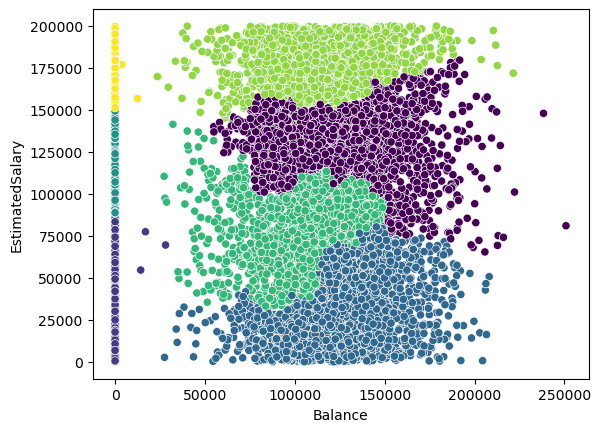

In [32]:
import seaborn as sb
sb.scatterplot(x=B.Balance,y=B.EstimatedSalary,c=B['Clusters'])

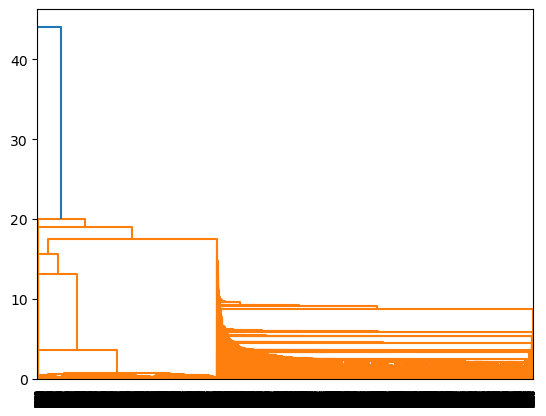

In [33]:
from scipy.cluster.hierarchy import dendrogram,linkage
from scipy.spatial import distance_matrix
import matplotlib.pyplot as plt
dendrogram(linkage(distance_matrix(Bnew.values,Bnew.values)))
plt.show()

<AxesSubplot:xlabel='Balance', ylabel='EstimatedSalary'>

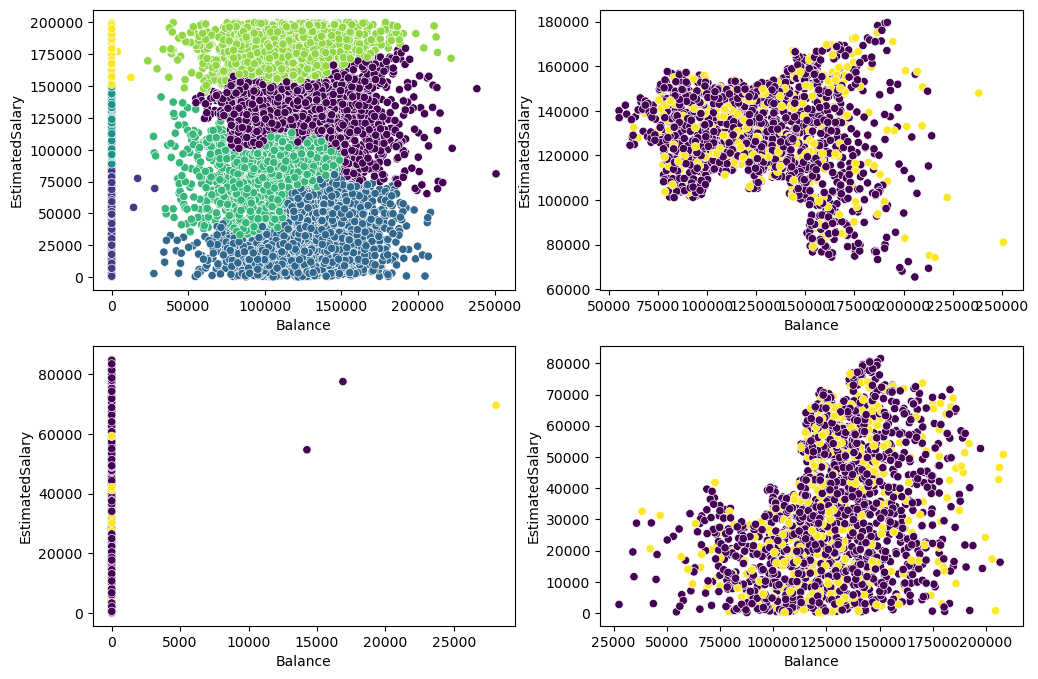

In [35]:
A['cluster']=clusters
A1 = A[["Balance","EstimatedSalary","Exited"]][A.cluster==0]
A2 = A[["Balance","EstimatedSalary","Exited"]][A.cluster==1]
A3 = A[["Balance","EstimatedSalary","Exited"]][A.cluster==2]
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
sb.scatterplot(x=A.Balance,y=A['EstimatedSalary'],c=clusters)

plt.subplot(2,2,2)
sb.scatterplot(x=A1.Balance,y=A1['EstimatedSalary'],c=A1.Exited)

plt.subplot(2,2,3)
sb.scatterplot(x=A2.Balance,y=A2['EstimatedSalary'],c=A2.Exited)

plt.subplot(2,2,4)
sb.scatterplot(x=A3.Balance,y=A3['EstimatedSalary'],c=A3.Exited)